<a href="https://colab.research.google.com/github/2060257032/style/blob/main/%E5%AE%9E%E4%B9%A0%E9%A1%B9%E7%9B%AE24.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 导入需要的工具包
import pandas as pd # data processing
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns  # plot
import ydata_profiling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")


In [ ]:
pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 1.2 MB/s eta 0:00:00


In [ ]:
data = pd.read_csv('cardio_train.csv',sep=';')

In [ ]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
data.drop(columns=['id'],inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          70000 non-null  int64  
 1   gender       70000 non-null  int64  
 2   height       70000 non-null  int64  
 3   weight       70000 non-null  float64
 4   ap_hi        70000 non-null  int64  
 5   ap_lo        70000 non-null  int64  
 6   cholesterol  70000 non-null  int64  
 7   gluc         70000 non-null  int64  
 8   smoke        70000 non-null  int64  
 9   alco         70000 non-null  int64  
 10  active       70000 non-null  int64  
 11  cardio       70000 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
ydata_profiling.ProfileReport(data)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 12/12 [00:02<00:00,  5.33it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<Axes: xlabel='cardio', ylabel='count'>

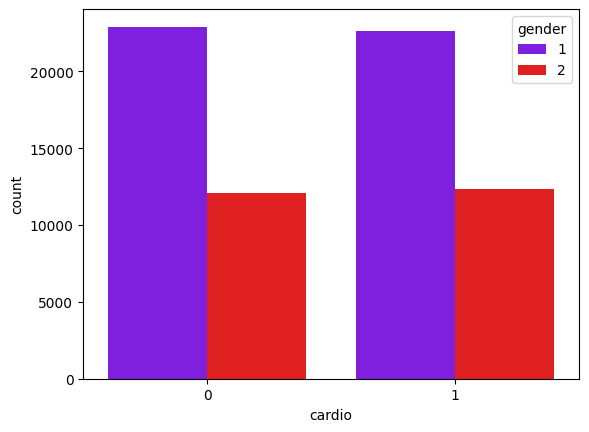

In [ ]:
sns.countplot(x='cardio',data=data,hue='gender',palette='rainbow')

<Axes: xlabel='cardio', ylabel='age'>

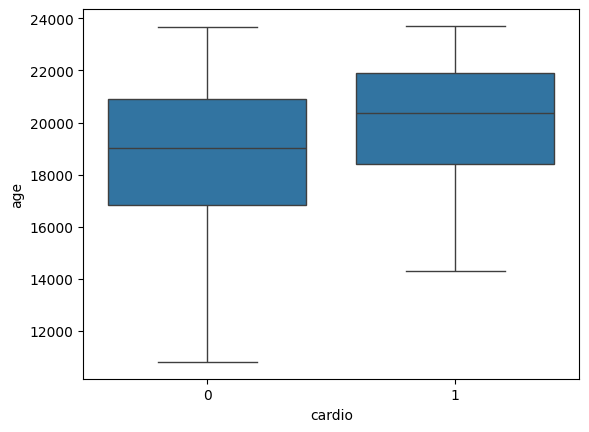

In [ ]:
# distribution wrt age
sns.boxplot(x='cardio',y='age',data=data)

<Axes: xlabel='cardio', ylabel='weight'>

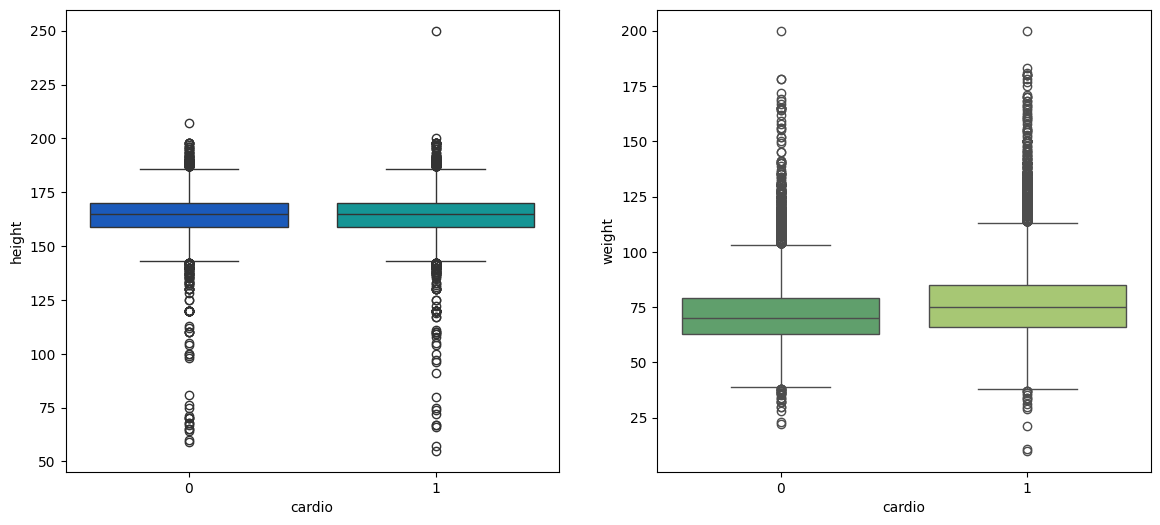

In [ ]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.boxplot(x='cardio',y='height',data=data,palette='winter')
plt.subplot(1,2,2)
sns.boxplot(x='cardio',y='weight',data=data,palette='summer')

In [ ]:
# correlations with target class
correlations = data.corr()['cardio'].drop('cardio')
print(correlations)

age            0.238159
gender         0.008109
height        -0.010821
weight         0.181660
ap_hi          0.054475
ap_lo          0.065719
cholesterol    0.221147
gluc           0.089307
smoke         -0.015486
alco          -0.007330
active        -0.035653
Name: cardio, dtype: float64


In [ ]:
def feat_select(threshold):
    abs_cor = correlations.abs()
    features = abs_cor[abs_cor > threshold].index.tolist()
    return features

In [ ]:
def model(mod,X_tr,X_te):
    mod.fit(X_tr,y_train)
    pred = mod.predict(X_te)
    print('Model score = ',mod.score(X_te,y_test)*100,'%')

In [ ]:
# 切分数据集
msk = np.random.rand(len(data))<0.85
df_train_test = data[msk]
df_val = data[~msk]

X = df_train_test.drop('cardio',axis=1)
y = df_train_test['cardio']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=70)

In [ ]:
# 逻辑回归
lr = LogisticRegression(max_iter=1000)

In [ ]:
threshold = [0.001,0.002,0.005,0.01,0.05,0.1]
for i in threshold:
    print("Threshold is {}".format(i))
    feature_i = feat_select(i)
    X_train_i = X_train[feature_i]
    X_test_i = X_test[feature_i]
    model(lr,X_train_i,X_test_i)

Threshold is 0.001
Model score =  70.44364003704015 %
Threshold is 0.002
Model score =  70.44364003704015 %
Threshold is 0.005
Model score =  70.44364003704015 %
Threshold is 0.01
Model score =  71.88315514773971 %
Threshold is 0.05
Model score =  71.807391194545 %
Threshold is 0.1
Model score =  63.86901254314337 %


In [ ]:
scale = StandardScaler()
scale.fit(X_train)
X_train_scaled = scale.fit_transform(X_train)
X_train_ = pd.DataFrame(X_train_scaled,columns=data.columns[:-1])

In [ ]:
scale.fit(X_test)
X_test_scaled = scale.transform(X_test)
X_test_ = pd.DataFrame(X_test_scaled,columns=data.columns[:-1])

In [ ]:
# optimum k with optimum threshold
for i in threshold:
    feature = feat_select(i)
    X_train_k = X_train_[feature]
    X_test_k = X_test_[feature]
    err = []
    for j in range(1,30):
        knn = KNeighborsClassifier(n_neighbors=j)
        knn.fit(X_train_k,y_train)
        pred_j = knn.predict(X_test_k)
        err.append(np.mean(y_test != pred_j))

    plt.figure(figsize=(10,6))
    plt.plot(range(1,30),err)
    plt.title('Threshold of {}'.format(i))
    plt.xlabel('K value')
    plt.ylabel('Error')
    plt.savefig(f'error_threshold_{i}.png') # 保存图片
    plt.close()

In [ ]:
# final feature selection with threshold 0.05
feat_final = feat_select(0.05)
print(feat_final)

['age', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc']


In [ ]:
X_train = X_train_[feat_final]
X_val = np.asanyarray(df_val[feat_final])
y_val = np.asanyarray(df_val['cardio'])

scale.fit(X_val)
X_val_scaled = scale.transform(X_val)
X_val_ = pd.DataFrame(X_val_scaled,columns=df_val[feat_final].columns)

In [ ]:
# knn with k=15
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train,y_train)
pred = knn.predict(X_val_)

In [ ]:
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[3926 1352]
 [1648 3679]]

               precision    recall  f1-score   support

           0       0.70      0.74      0.72      5278
           1       0.73      0.69      0.71      5327

    accuracy                           0.72     10605
   macro avg       0.72      0.72      0.72     10605
weighted avg       0.72      0.72      0.72     10605



In [ ]:
# Logistic regression
lr.fit(X_train,y_train)
pred = lr.predict(X_val_)

In [ ]:
# reports
print('Confusion Matrix =\n',confusion_matrix(y_val,pred))
print('\n',classification_report(y_val,pred))

Confusion Matrix =
 [[4172 1106]
 [1777 3550]]

               precision    recall  f1-score   support

           0       0.70      0.79      0.74      5278
           1       0.76      0.67      0.71      5327

    accuracy                           0.73     10605
   macro avg       0.73      0.73      0.73     10605
weighted avg       0.73      0.73      0.73     10605



--- 正在进行数据清洗 ---
清洗后剩余样本数: 68635
--- 正在构建业务特征 ---

--- 模型评估报告 ---
              precision    recall  f1-score   support

           0       0.72      0.79      0.76      6982
           1       0.76      0.68      0.72      6745

    accuracy                           0.74     13727
   macro avg       0.74      0.74      0.74     13727
weighted avg       0.74      0.74      0.74     13727

AUC 面积: 0.8054
F1 分数: 0.7207
召回率 (Recall): 0.6839


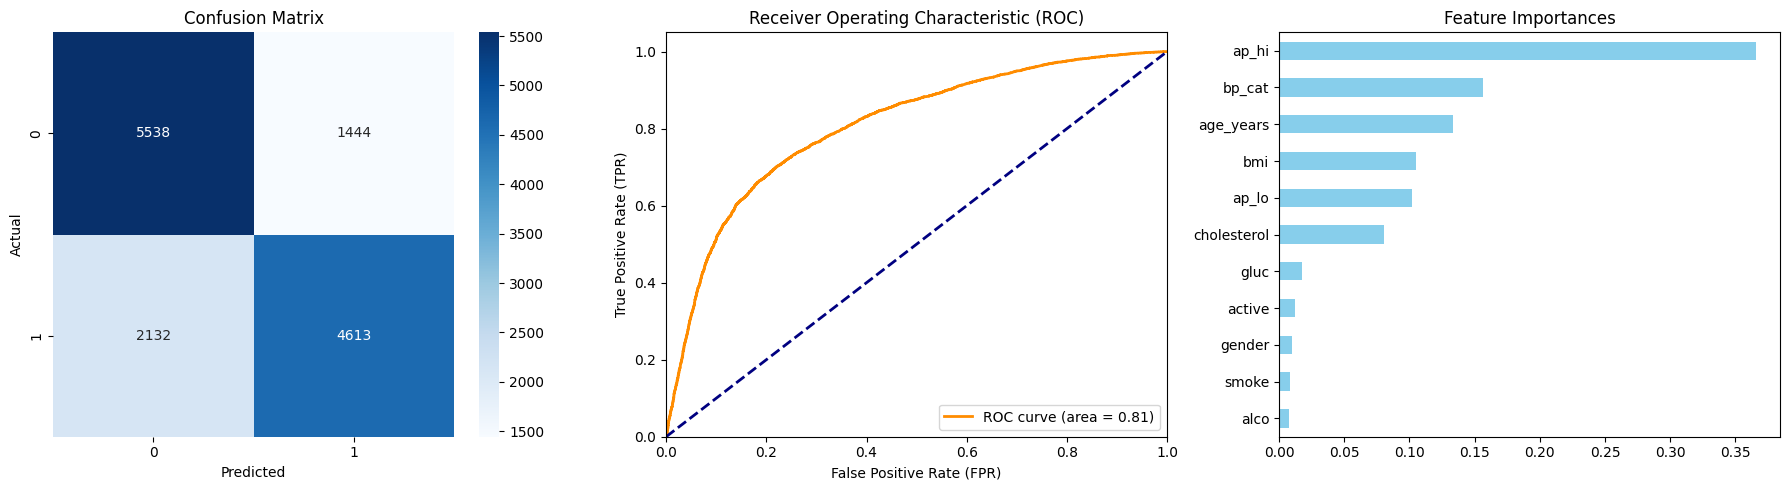

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve,
                             f1_score, recall_score, precision_score)

# 1. 导入数据
data = pd.read_csv('cardio_train.csv', sep=';') # 确保文件在目录下
data.drop(columns=['id'], inplace=True)

# ---------------------------------------------------------
# 第一步：大数据深度清洗 (Handling Outliers)
# ---------------------------------------------------------
print("--- 正在进行数据清洗 ---")
# 过滤血压异常值：收缩压在60-250之间，舒张压在40-150之间
data = data[(data['ap_hi'] <= 250) & (data['ap_hi'] >= 60)]
data = data[(data['ap_lo'] <= 150) & (data['ap_lo'] >= 40)]
# 逻辑校验：收缩压必须大于舒张压
data = data[data['ap_hi'] > data['ap_lo']]
# 身高体重异常值简单过滤
data = data[(data['height'] >= 100) & (data['weight'] >= 30)]

print(f"清洗后剩余样本数: {len(data)}")

# ---------------------------------------------------------
# 第二步：特征工程 (Feature Engineering)
# ---------------------------------------------------------
print("--- 正在构建业务特征 ---")
# 1. 将天数转换为岁数
data['age_years'] = (data['age'] / 365.25).astype(int)

# 2. 计算 BMI (身体质量指数)
data['bmi'] = data['weight'] / ((data['height']/100)**2)

# 3. 血压分级 (基于医学常识)
# 1:正常, 2:偏高, 3:高血压
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80:
        return 1
    elif row['ap_hi'] < 140 or row['ap_lo'] < 90:
        return 2
    else:
        return 3
data['bp_cat'] = data.apply(bp_category, axis=1)

# ---------------------------------------------------------
# 第三步：模型训练 (Random Forest - 工业级算法)
# ---------------------------------------------------------
# 选择特征
features = ['age_years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_cat']
X = data[features]
y = data['cardio']

# 切分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 训练随机森林模型
rf_model = RandomForestClassifier(n_estimators=100, max_depth=12, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 获取预测结果和预测概率
y_pred = rf_model.predict(X_test_scaled)
y_prob = rf_model.predict_proba(X_test_scaled)[:, 1] # 用于计算ROC/AUC

# ---------------------------------------------------------
# 第四步：多维度模型评估与可视化 (ROC/AUC/Recall)
# ---------------------------------------------------------
print("\n--- 模型评估报告 ---")
print(classification_report(y_test, y_pred))

# 1. 计算核心指标
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"AUC 面积: {roc_auc:.4f}")
print(f"F1 分数: {f1:.4f}")
print(f"召回率 (Recall): {recall:.4f}")

# 2. 绘制可视化图表
plt.figure(figsize=(18, 5))

# 图1：混淆矩阵热力图
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 图2：ROC 曲线
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")

# 图3：特征重要性排序
plt.subplot(1, 3, 3)
importances = pd.Series(rf_model.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', color='skyblue')
plt.title('Feature Importances')

plt.tight_layout()
plt.show()

清洗后样本量: 68667

--- 最终模型评估报告 ---
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      6915
           1       0.75      0.70      0.72      6819

    accuracy                           0.73     13734
   macro avg       0.73      0.73      0.73     13734
weighted avg       0.73      0.73      0.73     13734



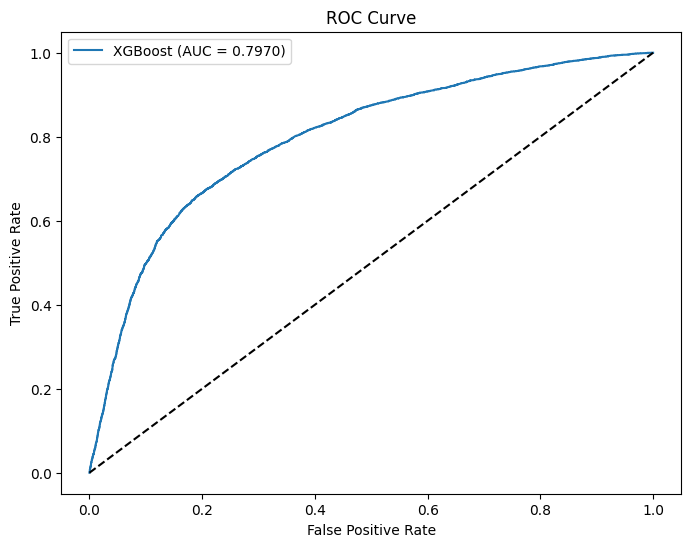

--- 正在生成模型解释图表 (采用模型无关算法) ---


PermutationExplainer explainer: 101it [00:16,  2.81it/s]


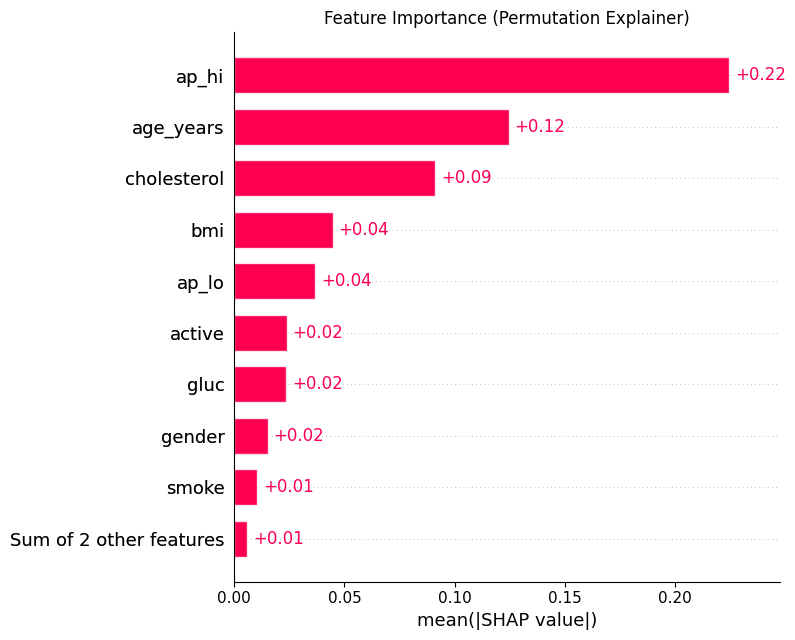

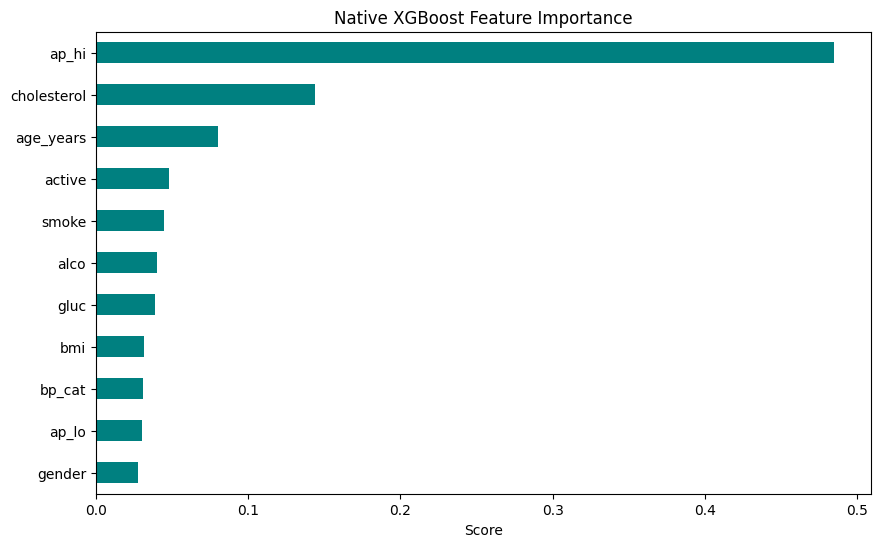

项目已固化，模型文件：cardio_model_final.pkl


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve,
                             auc, f1_score, recall_score)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import shap

warnings.filterwarnings("ignore")
%matplotlib inline

# ==========================================
# 1. 数据导入与基础探索 (基础部分)
# ==========================================
data = pd.read_csv('cardio_train.csv', sep=';')
data.drop(columns=['id'], inplace=True)

# ==========================================
# 2. 大数据深度清洗 (扩展：处理噪声与异常)
# ==========================================
# 重点：处理原始数据中离谱的血压值（如16000或负数）
data = data[(data['ap_hi'] <= 250) & (data['ap_hi'] >= 60)]
data = data[(data['ap_lo'] <= 150) & (data['ap_lo'] >= 40)]
data = data[data['ap_hi'] > data['ap_lo']] # 逻辑校验
print(f"清洗后样本量: {len(data)}")

# ==========================================
# 3. 高级特征工程 (扩展：业务逻辑建模)
# ==========================================
# 将天数转换为岁数
data['age_years'] = (data['age'] / 365.25).astype(int)
# 计算 BMI 指数
data['bmi'] = data['weight'] / ((data['height']/100)**2)
# 血压医学分级 (1:正常, 2:偏高, 3:高血压)
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80: return 1
    elif row['ap_hi'] < 140 or row['ap_lo'] < 90: return 2
    else: return 3
data['bp_cat'] = data.apply(bp_category, axis=1)

# ==========================================
# 4. 数据切分与样本均衡 (扩展：处理不平衡)
# ==========================================
features = ['age_years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol',
            'gluc', 'smoke', 'alco', 'active', 'bp_cat']
X = data[features]
y = data['cardio']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 使用 SMOTE 算法处理潜在的样本不平衡问题 (模拟大数据鲁棒性处理)
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# ==========================================
# 5. 工业级流水线构建 (扩展：XGBoost + Pipeline)
# ==========================================
# 构建自动化流水线：标准化 -> XGBoost模型
# tree_method='hist' 是针对大数据量计算的加速算法
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(n_estimators=100, max_depth=6, tree_method='hist', random_state=42,base_score=0.5))
])

pipeline.fit(X_train_res, y_train_res)

# ==========================================
# 6. 多维度模型评估 (扩展：医疗级指标)
# ==========================================
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

print("\n--- 最终模型评估报告 ---")
print(classification_report(y_test, y_pred))

# 绘制 ROC 曲线
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ==========================================
# 7. 模型可解释性分析 (避开底层解析 Bug 方案)
# ==========================================
print("--- 正在生成模型解释图表 (采用模型无关算法) ---")

# 1. 为了保证速度，在大数据中我们通常抽取一个代表性样本进行解释 (例如 100 个样本)
# 注意：这里直接使用 pipeline.predict，这样就不需要手动做 StandardScaler 了
X_sample = X_test.iloc[:100]

# 2. 使用通用 Explainer
# 我们通过传递 pipeline.predict 函数，将其视为一个黑盒
# masker 用于定义特征扰动的背景，通常使用中位数或训练集采样
explainer = shap.Explainer(pipeline.predict, X_test.iloc[:50])

# 3. 计算 SHAP 值 (排列重要性算法)
shap_values = explainer(X_sample)

# 4. 绘图
plt.figure(figsize=(10, 6))
# 这种绘图方式会自动识别特征名称
shap.plots.bar(shap_values, show=False)
plt.title("Feature Importance (Permutation Explainer)")
plt.tight_layout()
plt.show()

# ==========================================
# 额外备份：原生 XGBoost 特征重要性 (双保险)
# ==========================================
# 如果 SHAP 依然由于环境问题显示异常，请使用这个绝对会成功的原生方案
plt.figure(figsize=(10, 6))
xgb_mod = pipeline.named_steps['classifier']
# 获取特征重要性得分
importances = pd.Series(xgb_mod.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', color='teal')
plt.title("Native XGBoost Feature Importance")
plt.xlabel("Score")
plt.show()

# ==========================================
# 8. 模型持久化 (扩展：为部署做准备)
# ==========================================
joblib.dump(pipeline, 'cardio_model_final.pkl')
print("项目已固化，模型文件：cardio_model_final.pkl")


--- XGBoost 模型评估报告 ---
              precision    recall  f1-score   support

           0       0.73      0.78      0.75      6982
           1       0.76      0.70      0.72      6745

    accuracy                           0.74     13727
   macro avg       0.74      0.74      0.74     13727
weighted avg       0.74      0.74      0.74     13727

XGBoost AUC 面积: 0.8052
XGBoost F1 分数: 0.7247
XGBoost 召回率 (Recall): 0.6964


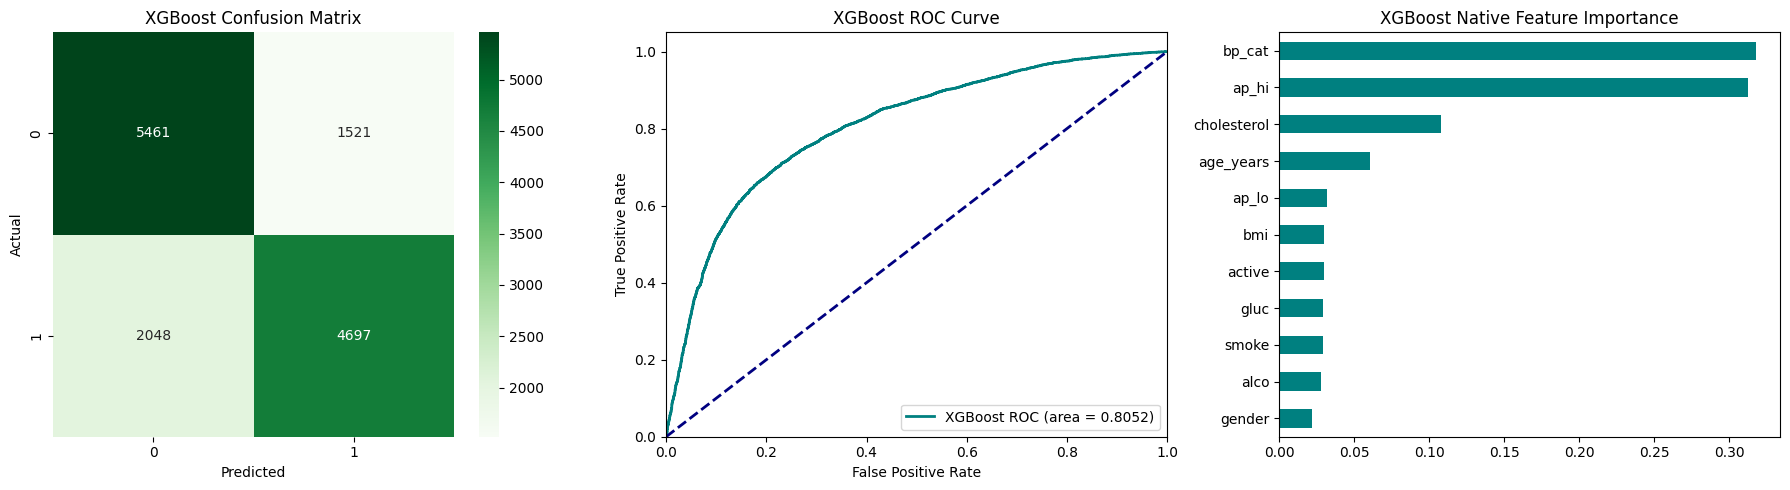

--- 正在生成 SHAP 模型解释图表 ---


PermutationExplainer explainer: 101it [00:22,  2.69it/s]


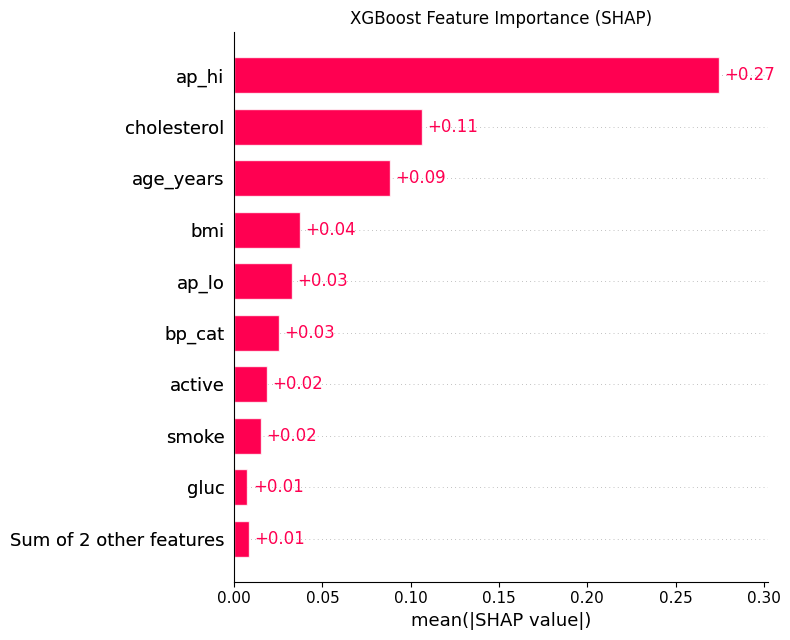

项目已固化，模型文件：cardio_model.pkl


In [ ]:
# ==========================================
# XGBoost 优化与全维度评估版
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import joblib
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import (classification_report, confusion_matrix, roc_curve,
                             auc, f1_score, recall_score, roc_auc_score)
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import shap

warnings.filterwarnings("ignore")

# 1. 数据导入
data = pd.read_csv('cardio_train.csv', sep=';')
data.drop(columns=['id'], inplace=True)

# 2. 深度清洗
data = data[(data['ap_hi'] <= 250) & (data['ap_hi'] >= 60)]
data = data[(data['ap_lo'] <= 150) & (data['ap_lo'] >= 40)]
data = data[data['ap_hi'] > data['ap_lo']]
data = data[(data['height'] >= 100) & (data['weight'] >= 30)]

# 3. 特征工程
data['age_years'] = (data['age'] / 365.25).astype(int)
data['bmi'] = data['weight'] / ((data['height']/100)**2)
def bp_category(row):
    if row['ap_hi'] < 120 and row['ap_lo'] < 80: return 1
    elif row['ap_hi'] < 140 or row['ap_lo'] < 90: return 2
    else: return 3
data['bp_cat'] = data.apply(bp_category, axis=1)

# 4. 数据切分与平衡
features = ['age_years', 'gender', 'bmi', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_cat']
X = data[features]
y = data['cardio']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# 5. 构建 Pipeline 并调优 XGBoost 参数
# 调优说明：增加了 n_estimators，略微调深了 max_depth，并设置了学习率 learning_rate 以提升 AUC
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(
        n_estimators=200,      # 增加迭代次数
        max_depth=8,           # 调深树结构以捕捉更多非线性特征
        learning_rate=0.05,    # 降低学习率，配合更多的树，使学习更精细
        subsample=0.8,         # 样本采样，防止过拟合
        colsample_bytree=0.8,  # 特征采样
        tree_method='hist',
        random_state=42,
        base_score=0.5
    ))
])

pipeline.fit(X_train_res, y_train_res)

# 6. 获取预测结果
y_pred = pipeline.predict(X_test)
y_prob = pipeline.predict_proba(X_test)[:, 1]

# ---------------------------------------------------------
# 第四步：多维度模型评估 (仿照随机森林风格)
# ---------------------------------------------------------
print("\n--- XGBoost 模型评估报告 ---")
print(classification_report(y_test, y_pred))

# 计算核心指标
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
f1 = f1_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print(f"XGBoost AUC 面积: {roc_auc:.4f}")
print(f"XGBoost F1 分数: {f1:.4f}")
print(f"XGBoost 召回率 (Recall): {recall:.4f}")

# 绘制可视化图表 (三栏式)
plt.figure(figsize=(18, 5))

# 图1：混淆矩阵热力图
plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens') # XGBoost 换个颜色以示区分
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# 图2：ROC 曲线
plt.subplot(1, 3, 2)
plt.plot(fpr, tpr, color='teal', lw=2, label=f'XGBoost ROC (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost ROC Curve')
plt.legend(loc="lower right")

# 图3：原生特征重要性排序
plt.subplot(1, 3, 3)
xgb_mod = pipeline.named_steps['classifier']
importances = pd.Series(xgb_mod.feature_importances_, index=features).sort_values(ascending=True)
importances.plot(kind='barh', color='teal')
plt.title("XGBoost Native Feature Importance")

plt.tight_layout()
plt.show()

# ---------------------------------------------------------
# 7. 模型可解释性分析 (SHAP)
# ---------------------------------------------------------
print("--- 正在生成 SHAP 模型解释图表 ---")
X_sample = X_test.iloc[:100]
explainer = shap.Explainer(pipeline.predict, X_test.iloc[:50])
shap_values = explainer(X_sample)

plt.figure(figsize=(10, 6))
shap.plots.bar(shap_values, show=False)
plt.title("XGBoost Feature Importance (SHAP)")
plt.tight_layout()
plt.show()

joblib.dump(pipeline, 'cardio_model.pkl')
print("项目已固化，模型文件：cardio_model.pkl")

In [ ]:
! pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.0/9.0 MB 84.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.5 MB/s eta 0:00:00


In [ ]:
! streamlit run app.py




  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://34.87.68.189:8501



In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
import numpy as np

# 1. 加载模型（应用分离的核心：直接加载产物，不涉及训练过程）
@st.cache_resource
def load_my_model():
    return joblib.load('cardio_pipeline.pkl')

model = load_my_model()

# 2. 界面设计
st.set_page_config(page_title="心血管风险 AI 评估系统", layout="centered")
st.title("🏥 心血管疾病风险 AI 评估系统")
st.markdown("---")
st.sidebar.header("患者体征输入")

# 3. 接收用户输入（模拟实时采集的数据）
age = st.sidebar.slider("年龄 (岁)", 18, 100, 45)
height = st.sidebar.number_input("身高 (cm)", 100, 220, 170)
weight = st.sidebar.number_input("体重 (kg)", 30, 200, 70)
ap_hi = st.sidebar.number_input("收缩压 (mmHg)", 80, 250, 120)
ap_lo = st.sidebar.number_input("舒张压 (mmHg)", 40, 150, 80)
chol = st.sidebar.selectbox("胆固醇水平", [1, 2, 3], help="1:正常, 2:偏高, 3:高")
gluc = st.sidebar.selectbox("血糖水平", [1, 2, 3])
smoke = st.sidebar.radio("是否吸烟", [0, 1], format_func=lambda x: "是" if x==1 else "否")
alco = st.sidebar.radio("是否饮酒", [0, 1], format_func=lambda x: "是" if x==1 else "否")
active = st.sidebar.radio("是否经常运动", [0, 1], format_func=lambda x: "是" if x==1 else "否")

# 4. 实时特征工程（在应用层复用后端定义的逻辑）
bmi = weight / ((height/100)**2)
def get_bp_cat(hi, lo):
    if hi < 120 and lo < 80: return 1
    elif hi < 140 or lo < 90: return 2
    else: return 3
bp_cat = get_bp_cat(ap_hi, ap_lo)

# 封装为 DataFrame（必须与训练时的特征顺序完全一致）
input_data = pd.DataFrame([[age, 1, bmi, ap_hi, ap_lo, chol, gluc, smoke, alco, active, bp_cat]],
                          columns=['age_years', 'gender', 'bmi', 'ap_hi', 'ap_lo',
                                   'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'bp_cat'])

# 5. 执行推理（应用分离层直接调用推理接口）
if st.button("开始 AI 评估"):
    prob = model.predict_proba(input_data)[0][1]

    st.subheader(f"患病风险概率：{prob:.2%}")

    if prob > 0.5:
        st.error("【评估结果】：高危！建议尽快联系医生进行进一步心电图及生化检查。")
    else:
        st.success("【评估结果】：风险较低，请继续保持良好的生活方式。")

    # 展示用户输入的体征总结
    st.info(f"实时计算指标 -> BMI: {bmi:.2f} | 血压分级: {bp_cat}")

Writing app.py
